In [1]:
#Importing dependencies 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read files and create df
whale_returns_csv = Path('whale_returns.csv')
algo_returns_csv = Path('algo_returns.csv')
sp500_returns_csv = Path('sp500_history.csv')


whale_returns_df = pd.read_csv(whale_returns_csv)
algo_returns_df = pd.read_csv(algo_returns_csv)
sp500_returns_df = pd.read_csv(sp500_returns_csv)


In [3]:
#clean data

#clean whale 
whale_returns_df.isnull().value_counts()
whale_returns_df.dropna(inplace=True)

#clean algo
algo_returns_df.isnull().value_counts()
algo_returns_df.dropna(inplace=True)

#clean sp500
sp500_returns_df.isnull().value_counts()
sp500_returns_df.dropna(inplace=True)

#remove sp500 $ sign
sp500_returns_df['Close'] = sp500_returns_df['Close'].str.replace('$', '')
sp500_returns_df['Close'] = sp500_returns_df['Close'].astype(float)

algo_returns_df.head(30)


C:\Users\ANTHRO~1\AppData\Local\Temp/ipykernel_12468/3101174874.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_returns_df['Close'] = sp500_returns_df['Close'].str.replace('$', '')


,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
11,2014-06-12,-0.000028,-0.003841
12,2014-06-13,0.001917,-0.000814
13,2014-06-16,0.001084,0.001831
14,2014-06-17,0.000922,0.006870
15,2014-06-18,-0.006303,0.007228


In [4]:
#Turn sp500 'Close' data to 'Returns'
sp500_returns_df.set_index(pd.to_datetime(sp500_returns_df['Date'], infer_datetime_format=True), inplace=True)
sp500_returns_df.drop(columns=['Date'],inplace=True)
sp500_returns_df = sp500_returns_df.pct_change()


#Reset index

sp500_returns_df.dropna()
sp500_returns_df.reset_index(inplace=True)
sp500_returns_df.sort_index(ascending=False)

,Date,Close
1648,2012-10-01,-0.000872
1647,2012-10-02,-0.003611
1646,2012-10-03,-0.007123
1645,2012-10-04,0.000322
1644,2012-10-05,0.003469
...,...,...
4,2019-04-16,0.002279
3,2019-04-17,-0.001577
2,2019-04-18,-0.001011
1,2019-04-22,-0.008764


In [5]:
#joining dataframes
#First set indices. 
sp500_returns_df.set_index(pd.to_datetime(sp500_returns_df['Date'], infer_datetime_format=True), inplace=True)
sp500_returns_df.drop(columns=['Date'], inplace=True)

whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)

algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)

#algo_returns_df.head()
#Join dataframes
analysis_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis=1)
analysis_df.dropna(inplace=True)
analysis_df.rename(columns = {'Close': 'S&P 500'}, inplace=True)


<AxesSubplot:xlabel='Date'>

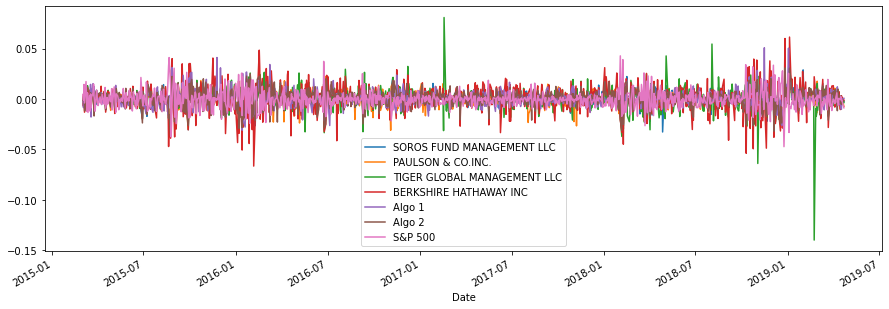

In [6]:
analysis_df.head()
analysis_df.plot(figsize=(15,5))


<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

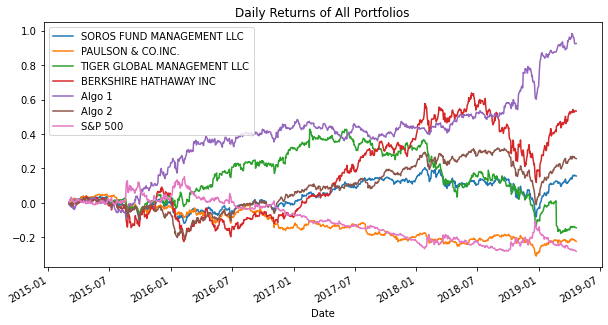

In [7]:
analysis_cumulative_returns = (1 + analysis_df).cumprod() - 1
analysis_cumulative_returns.plot(figsize=(10,5), title='Daily Returns of All Portfolios')

In [8]:
print(f'Soros Fund Management, Berkshire Hathaway, Inc., Tiger Global, and others outperform the S&P 500')

Soros Fund Management, Berkshire Hathaway, Inc., Tiger Global, and others outperform the S&P 500


<AxesSubplot:>

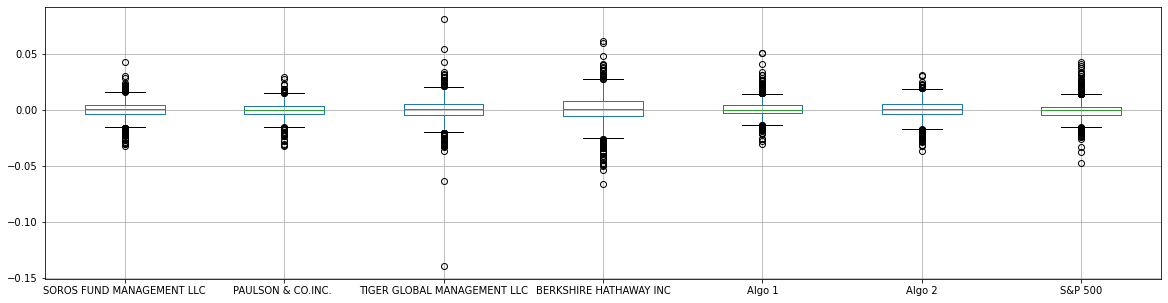

In [9]:
#print boxplot for all of the returns
analysis_df.boxplot(figsize=(20,5))

In [10]:
#determine most risky portfolios
analysis_df.describe()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,0.000171,-0.000217,-0.000089,0.000494,0.000658,0.000254,-0.000281
std,0.007896,0.007026,0.010897,0.012919,0.007623,0.008341,0.008587
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.047250
25%,-0.003641,-0.004044,-0.004792,-0.005655,-0.003257,-0.003799,-0.004456
50%,0.000517,0.000000,0.000313,0.000726,0.000069,0.000698,-0.000450
75%,0.004320,0.003629,0.005233,0.007565,0.003874,0.005226,0.002881
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.042730


In [11]:
analysis_df_std = analysis_df.std()
analysis_df_std.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

In [12]:
print('Berkshire Hathaway is riskier than the S&P 500 due to its standard deviation')

Berkshire Hathaway is riskier than the S&P 500 due to its standard deviation


In [13]:
#confirming risky portfolios by calculating beta
soros_covariance = analysis_df['SOROS FUND MANAGEMENT LLC'].cov(analysis_df['S&P 500'])
berkshire_covariance = analysis_df['BERKSHIRE HATHAWAY INC'].cov(analysis_df['S&P 500'])
tiger_covariance = analysis_df['TIGER GLOBAL MANAGEMENT LLC'].cov(analysis_df['S&P 500'])
#paulson_covariance = analysis_df['PAULSON & CO.INC.'].cov(analysis_df['S&P 500'])
algo1_covariance = analysis_df['Algo 1'].cov(analysis_df['S&P 500'])
algo2_covariance = analysis_df['Algo 2'].cov(analysis_df['S&P 500'])

#calculate variance of s&p 500
variance = analysis_df['S&P 500'].var()

#calculating betas
soros_beta = soros_covariance / variance
berkshire_beta = berkshire_covariance / variance
tiger_beta = tiger_covariance / variance
#paulson_beta = paulson_covariance / variance
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance
print(f'Soros Beta: + {round(soros_beta, 10)} | Berkshire Beta: + {round(berkshire_beta, 10)} | Tiger Beta: + {round(tiger_beta, 10)} | Algo 1 Beta: + {round(algo1_beta, 10)} | Algo 2 Beta: + {round(algo2_beta, 10)}')
#analysis_df.head()

Soros Beta: + 0.0005275302 | Berkshire Beta: + -0.0208464894 | Tiger Beta: + -0.0019097028 | Algo 1 Beta: + -0.0301492145 | Algo 2 Beta: + -0.0021292377


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

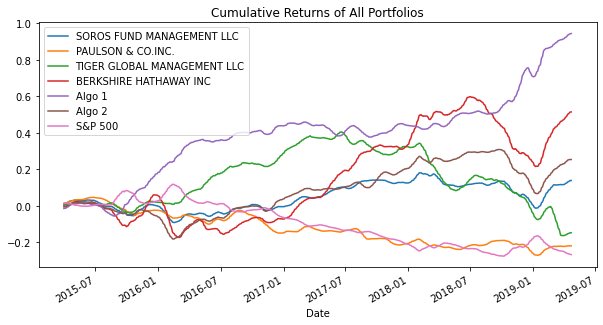

In [41]:
#Calculate exponentially weighted moving average with 21 day window
analysis_cumulative_returns.rolling(window=21).mean().plot(figsize=(10,5), title='Cumulative Returns of All Portfolios')


<AxesSubplot:>

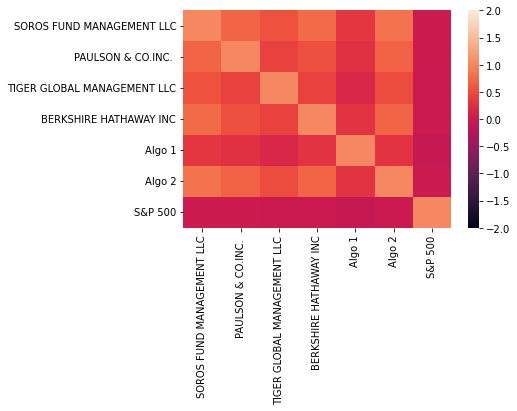

In [42]:
#Calculate Correlation 
price_correlation = analysis_df.corr()
#Plot Correlation
sns.heatmap(price_correlation, vmin=-2, vmax=2)


In [15]:
#Calculate Sharpe Ratios
analysis_sharpe_ratios = (analysis_df.mean() * 252) / (analysis_df_std * np.sqrt(252))
analysis_sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all Portfolios'}>

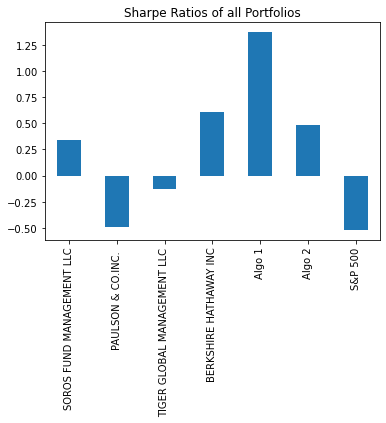

In [16]:
#Plot sharpe ratios
analysis_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios of all Portfolios')

In [17]:
print(f'Algorithms 1 and 2 outperform the S&P 500 and the Sorosand Tiger Global whale portfolio')

Algorithms 1 and 2 outperform the S&P 500 and the Sorosand Tiger Global whale portfolio


<AxesSubplot:title={'center':'Rolling 21 Day Std. Dev of All Portfolios'}, xlabel='Date'>

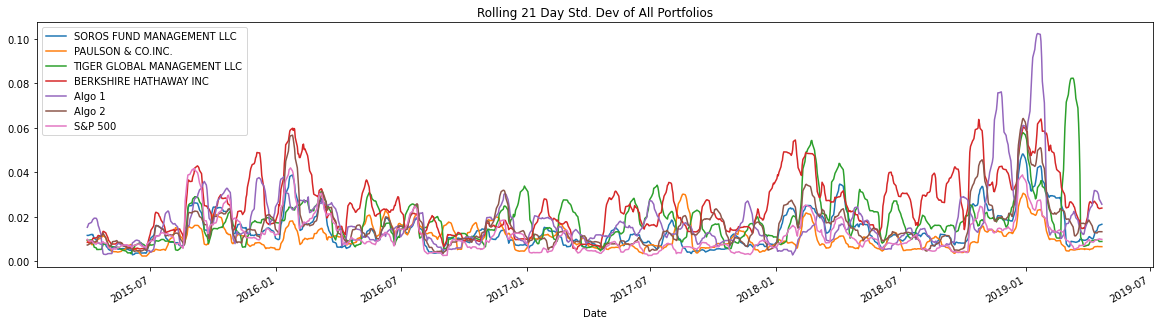

In [25]:
#Calculate and plot rolling 21 day std deviation 

analysis_cumulative_returns.rolling(window=21).std().plot(figsize=(20,5), title='Rolling 21 Day Std. Dev of All Portfolios')

<AxesSubplot:xlabel='Algo 2', ylabel='S&P 500'>

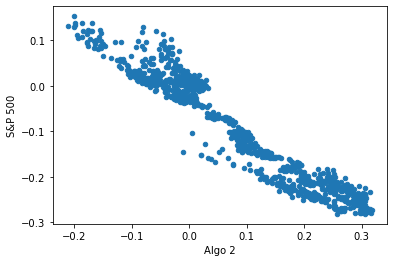

In [39]:
#Calculate and plot correlation between each stock. 
# analysis_cumulative_returns.plot(kind='scatter', x='PAULSON & CO.INC.', y='S&P 500')
# analysis_cumulative_returns.plot(kind='scatter', x='TIGER GLOBAL MANAGEMENT LLC', y='S&P 500')
# analysis_cumulative_returns.plot(kind='scatter', x='BERKSHIRE HATHAWAY INC', y='S&P 500')
# analysis_cumulative_returns.plot(kind='scatter', x='Algo 1', y='S&P 500')
analysis_cumulative_returns.plot(kind='scatter', x='Algo 2', y='S&P 500')

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Algo 2 and S&P 500'}, xlabel='Algo 2', ylabel='S&P 500'>

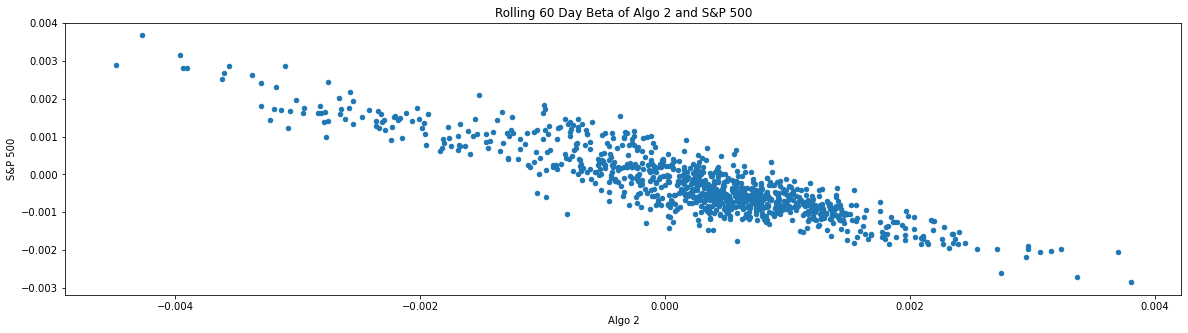

In [65]:

#Calculate and plot rolling 60 day beta against S&P 500 

analysis_df.rolling(window=60).mean().plot(kind='scatter', figsize=(20,5), x='Algo 2', y='S&P 500', title='Rolling 60 Day Beta of Algo 2 and S&P 500')